In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as n
import glob
from astropy.io import fits
from scipy.interpolate import interp1d
import pickle

In [6]:
m2micron = 1e6       #[microns/meters]
c = 2.99792458e8     #[m/s]

def convert_Jy_to_F_lam(wave_arr, flux_arr):
    
    #flux_arr input array in jansky
    #wave_arr input array in microns
    
    wave_arr_meters = wave_arr/m2micron        #meters
    flux_arr *= 1e-26           #[W/m^2/Hz]
    flux_arr *= c/(wave_arr_meters**2) #[W/m^2/m]
    flux_arr /= m2micron        #[W/m^2/microns] 
    
    return flux_arr

In [11]:
spectra_files = glob.glob('*/spectra/*h.txt')           
spectra_files


['F170LP_G235H_current_pipeline/spectra/detector1_f170lp_g235h.txt',
 'F170LP_G235H_current_pipeline/spectra/detector2_f170lp_g235h.txt',
 'F100LP_G140H_current_pipeline/spectra/detector1_f100lp_g140h.txt',
 'F100LP_G140H_current_pipeline/spectra/detector2_f100lp_g140h.txt',
 'F290LP_G395H_current_pipeline/spectra/detector2_f290lp_g395h.txt',
 'F290LP_G395H_current_pipeline/spectra/detector1_f290lp_g395h.txt']

<IPython.core.display.Javascript object>


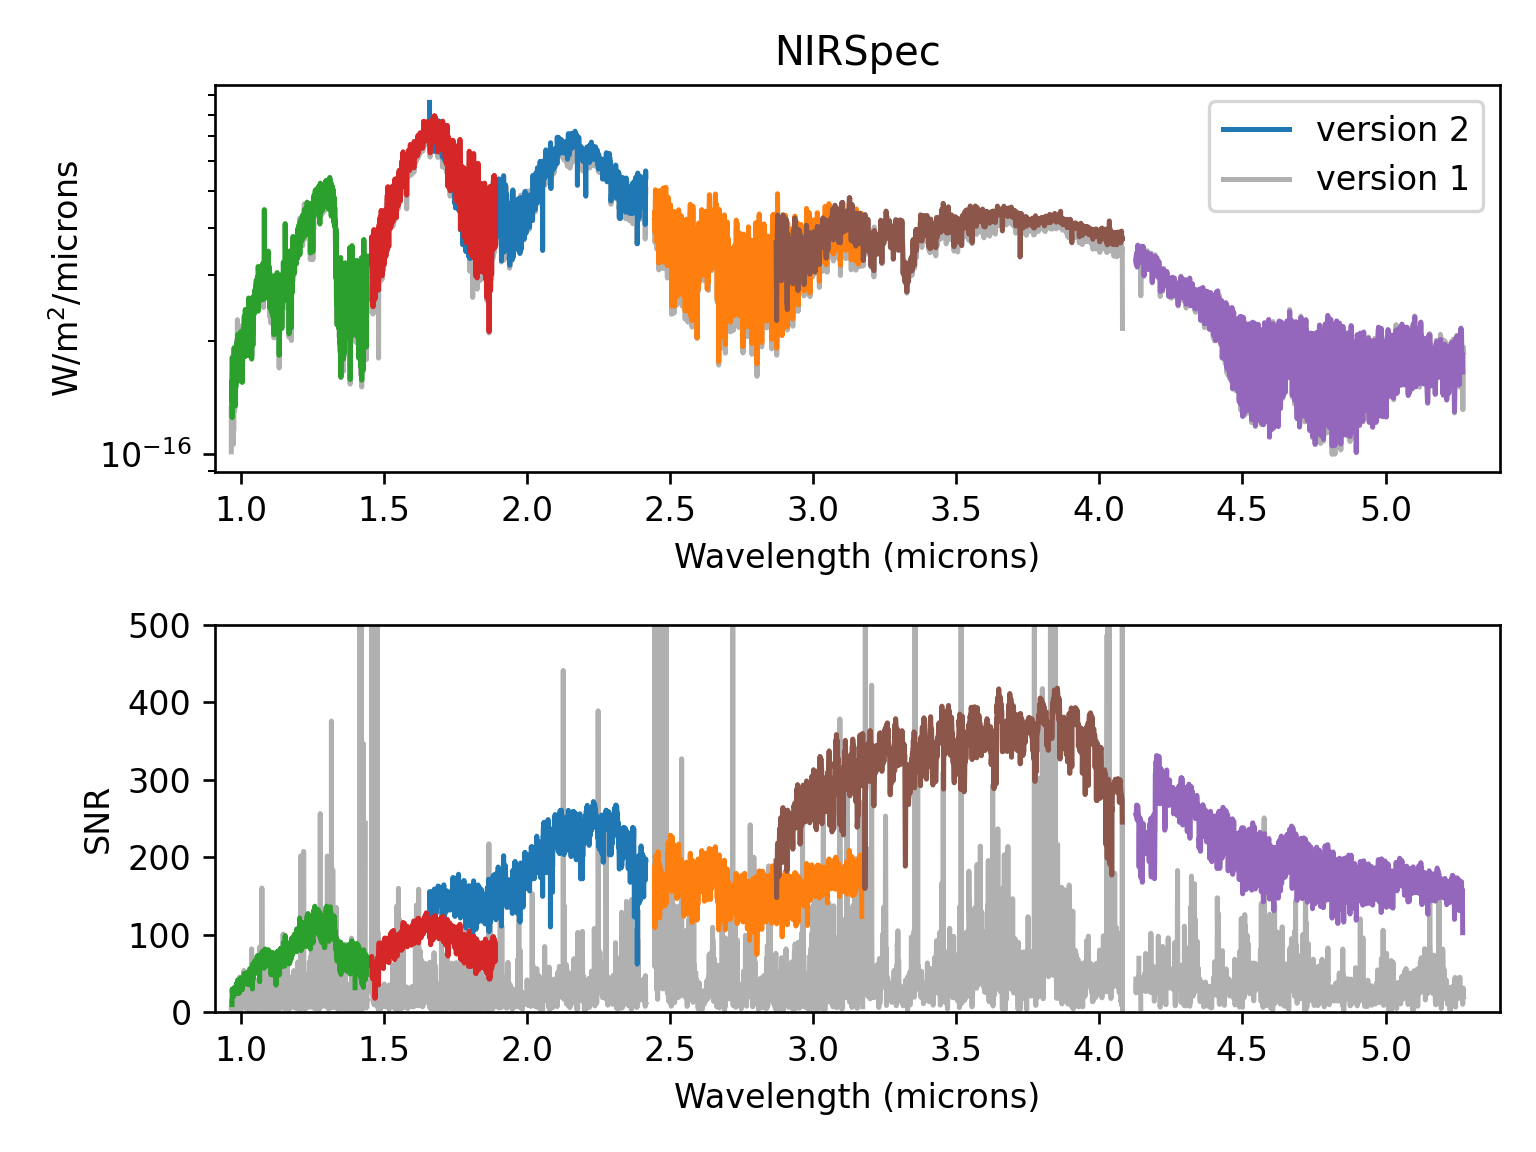

/var/folders/1s/nd774lkj1234c0k9rq5n8gn40000gn/T/ipykernel_47377/3936480709.py:72: RuntimeWarning: divide by zero encountered in divide
  plt.plot(wavelength_v1[nirspec], flux_v1[nirspec]/flux_err_v1[nirspec], color = '#b1b0b0', label = 'version 1', zorder = 0)


In [12]:

nirspec_flux = n.array([])
nirspec_flux_err = n.array([])
nirspec_wavelength = n.array([])
nirspec_bands = n.array([])

%matplotlib notebook
for i, file in enumerate(spectra_files):
    data = n.genfromtxt(file)
    
    part1 = file.split('/')[-1].split('_')[1]
    part2 = file.split('/')[-1].split('_')[2].split('.')[0]
    mode = 'NIRSpec IFU ' + part2 + '/' + part1
    
    wavelength = data[:,0]
    flux = data[:,1]
    flux_err = data[:,2]
    band_info = n.empty(len(flux))
    band_info = band_info.astype(str)
    band_info[:] = mode
    
    snr = flux/flux_err
    
    flux = convert_Jy_to_F_lam(wavelength, flux) #[W/m^2/microns] 
    flux_err = flux/snr
    
    if i == 0:
        plt.subplot(211)
        plt.plot(wavelength, flux, label = 'version 2')
        
        plt.subplot(212)
        plt.plot(wavelength, snr)
    else:
        plt.subplot(211)
        plt.plot(wavelength, flux)
        
        plt.subplot(212)
        plt.plot(wavelength, snr)
        
    
    
    nirspec_flux = n.append(nirspec_flux, flux)
    nirspec_flux_err = n.append(nirspec_flux_err, flux_err)
    nirspec_wavelength = n.append(nirspec_wavelength, wavelength)
    nirspec_bands = n.append(nirspec_bands, band_info)
    
nirspec_bands = nirspec_bands.astype(str)

#old spectrum 
v1_data_file = n.genfromtxt('VHS1256b_V1.txt', delimiter = ',', skip_header = 1, dtype = 'str')
wavelength_v1 = v1_data_file[:,0].astype(float) #microns
flux_v1 = v1_data_file[:,1].astype(float)  #jy
flux_err_v1 = v1_data_file[:,2].astype(float)  #jy
band_no_v1 = v1_data_file[:,3].astype('str')

nirspec = n.where( (band_no_v1 == 'NIRSpec IFU g235h/f170lp') | 
                  (band_no_v1 == 'NIRSpec IFU g395h/f290lp') | 
                  (band_no_v1 == 'NIRSpec IFU g140h/f100lp') )

plt.subplot(211)
plt.plot(wavelength_v1[nirspec], flux_v1[nirspec], color = '#b1b0b0', label = 'version 1', zorder = 0)
#plt.plot(miri_wavelength, miri_flux)
plt.title('NIRSpec')
plt.ylabel('W/m$^2$/microns')
plt.xlabel('Wavelength (microns)')
plt.yscale('log')
plt.xlim([.910, 5.4])
plt.tight_layout()
plt.legend()


plt.subplot(212)
plt.plot(wavelength_v1[nirspec], flux_v1[nirspec]/flux_err_v1[nirspec], color = '#b1b0b0', label = 'version 1', zorder = 0)
plt.xlim([.910, 5.4])
plt.ylim([0,500])
plt.ylabel('SNR')
plt.xlabel('Wavelength (microns)')
plt.tight_layout()
plt.show()
